In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [3]:
os.getcwd()
os.chdir("C:/Users/surajit.bal_embibe/Desktop/Call_Centre_Customer_Churn_Alalysis")
os.getcwd()

'C:\\Users\\surajit.bal_embibe\\Desktop\\Call_Centre_Customer_Churn_Alalysis'

'C:\\Users\\surajit.bal_embibe\\Desktop\\Call_Centre_Customer_Churn_Alalysis'

In [4]:
data = pd.read_csv("Data/vw_ChurnData.csv")
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


## Data Processing

In [6]:
# Drop columns that wont be used for prediction
data.drop(["Customer_ID", "Churn_Category", "Churn_Reason"], axis = 1, inplace = True)

In [7]:
# Handle missing values (you can choose other strategies based on your needs)
data.fillna("Unknown", inplace=True)

# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
     'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
     'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing', 'Payment_Method'
]


# Encode categorical variables except the target variables
label_encoders = {}
for i in columns_to_encode:
    label_encoders[i] = LabelEncoder()
    data[i] = label_encoders[i].fit_transform(data[i])

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Ensure all columns are numeric by converting any potential non-numeric columns
data = data.apply(pd.to_numeric, errors='coerce')

# Split data into features and target
x = data.drop('Customer_Status', axis = 1)
y = data['Customer_Status']


# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [8]:
# Train Random Forest Model
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators= 100, random_state= 42)

# Train the model
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Evaluate Model
# Make Predictions
y_prediction = rf_model.predict(x_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_prediction))
print("\nClassification Report:")
print(classification_report(y_test, y_prediction))

# Feature Selection Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

Confusion Matrix:
[[789  52]
 [135 226]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       841
           1       0.81      0.63      0.71       361

    accuracy                           0.84      1202
   macro avg       0.83      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



<Figure size 1500x600 with 0 Axes>

<Axes: ylabel='None'>

Text(0.5, 1.0, 'Feature Importances')

Text(0.5, 0, 'Relative Importance')

Text(0, 0.5, 'Feature Names')

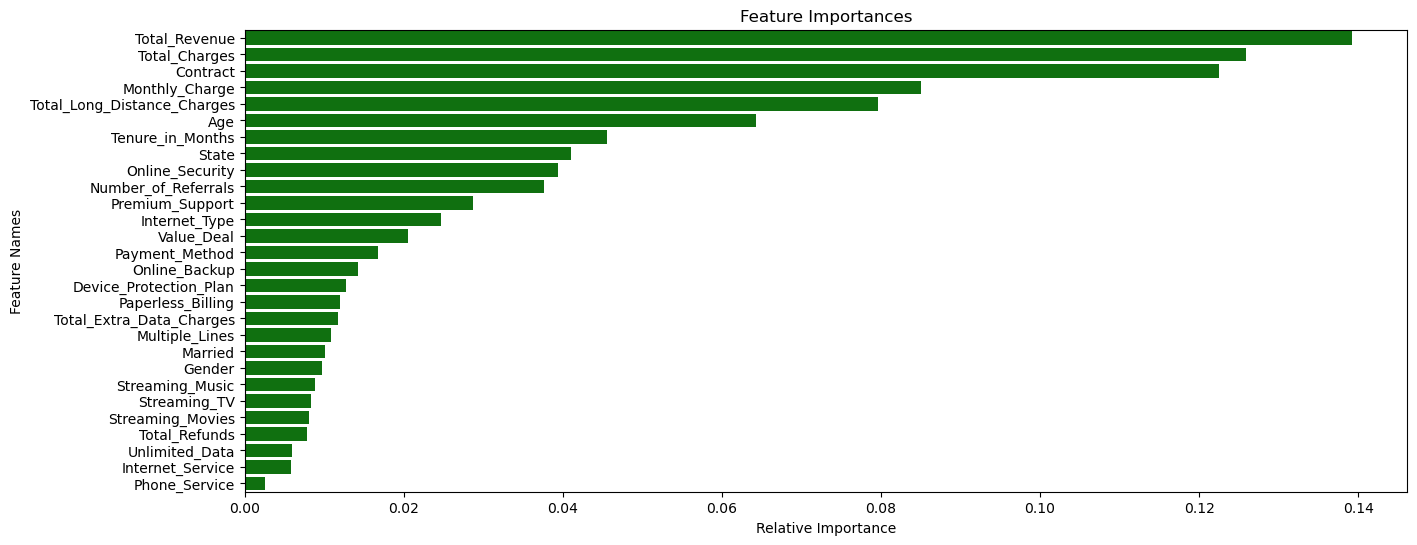

In [10]:
# Plot the feature importances
plt.figure(figsize = (15,6))
sns.barplot(x= importances[indices], y= x.columns[indices], color = 'green')
plt.title("Feature Importances")
plt.xlabel("Relative Importance")
plt.ylabel("Feature Names")
plt.show()

## Predict on New Data

In [12]:
new_data = pd.read_csv("Data/vw_JoinData.csv")
new_data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,Bank Withdrawal,72.10,72.1,0.0,0,7.77,79.87,Joined,NaN,NaN
1,57256-BIH,Female,18,No,Bihar,9,7,NaN,Yes,No,...,Credit Card,19.85,57.2,0.0,0,9.36,66.56,Joined,NaN,NaN
2,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,Credit Card,44.30,44.3,0.0,0,42.95,87.25,Joined,NaN,NaN
3,66612-KAR,Female,58,Yes,Karnataka,11,18,NaN,Yes,No,...,Credit Card,19.95,58.0,0.0,0,8.07,66.07,Joined,NaN,NaN
4,22119-WES,Male,31,Yes,West Bengal,5,5,NaN,Yes,No,...,Credit Card,20.05,33.7,0.0,0,3.62,37.32,Joined,NaN,NaN


In [13]:
# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Handle missing values by filling NaNs with a placeholder for categorical columns
new_data.fillna('Unknown', inplace=True)

In [14]:
# Assuming 'label_encoders' is the dictionary of saved LabelEncoders from the training process
for column in new_data.select_dtypes(include=['object']).columns:
    if column in label_encoders:
        # Handle unseen labels (if any) by assigning them as 'Unknown'
        unseen_labels = set(new_data[column].unique()) - set(label_encoders[column].classes_)
        if unseen_labels:
            label_encoders[column].classes_ = np.append(label_encoders[column].classes_, 'Unknown')
        
        # Transform the column using the existing LabelEncoder
        new_data[column] = new_data[column].apply(lambda x: 'Unknown' if x not in label_encoders[column].classes_ else x)
        new_data[column] = label_encoders[column].transform(new_data[column])

In [15]:
# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned" (assuming '1' represents churned)
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]
original_data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Customer_Status_Predicted
0,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,72.10,72.1,0.0,0,7.77,79.87,Joined,NaN,NaN,1
1,57256-BIH,Female,18,No,Bihar,9,7,NaN,Yes,No,...,19.85,57.2,0.0,0,9.36,66.56,Joined,NaN,NaN,1
2,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,44.30,44.3,0.0,0,42.95,87.25,Joined,NaN,NaN,1
3,66612-KAR,Female,58,Yes,Karnataka,11,18,NaN,Yes,No,...,19.95,58.0,0.0,0,8.07,66.07,Joined,NaN,NaN,1
4,22119-WES,Male,31,Yes,West Bengal,5,5,NaN,Yes,No,...,20.05,33.7,0.0,0,3.62,37.32,Joined,NaN,NaN,1


In [16]:
# Save the results
#original_data.to_csv("Data/Probable_Churn_prediction.csv", index = False)